<a href="https://colab.research.google.com/github/RomalPatel28/Romal_INFO5731_Fall2021/blob/main/INFO5731_Assignment_Four.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 Assignment Four**

In this assignment, you are required to conduct topic modeling, sentiment analysis based on **the dataset you created from assignment three**.

# **Question 1: Topic Modeling**

(30 points). This question is designed to help you develop a feel for the way topic modeling works, the connection to the human meanings of documents. Based on the dataset from assignment three, write a python program to **identify the top 10 topics in the dataset**. Before answering this question, please review the materials in lesson 8, especially the code for LDA and LSA. The following information should be reported:

(1) Features (top n-gram phrases) used for topic modeling.

(2) Top 10 clusters for topic modeling.

(3) Summarize and describe the topic for each cluster. 


In [ ]:
# Write your code here

from gensim.models import LsiModel
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import os.path
from gensim import corpora
import matplotlib.pyplot as plt

import pandas as pd
reviews_df = pd.read_csv("romal_reviews_cleanfile.csv")
reviews_df


,document_id,clean_text,sentiment
0,0,carrier activate unpaid overdue charges unusable,negative
1,1,certified dead pixels flickering,negative
2,2,arrived cracked corner unlock button soft mush...,neutral
3,3,used renewed private seller selling activate v...,negative
4,4,scared go wrong looks doesnt 1 100 recommend,positive
...,...,...,...
495,495,fine factory opens every specific apps install...,negative
496,496,renewed looks feels brand less exception tape ...,positive
497,497,works far currently spending check areas seems...,negative
498,498,pray exercising corporate selling someones sto...,positive


In [ ]:
#Basic Pre-processing steps
import nltk
nltk.download('punkt')

# Tokenizing the string
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'\w+')
reviews_df['Tokenization'] = reviews_df['clean_text'].apply(lambda x: tokenizer.tokenize(x))

import nltk
nltk.download('stopwords')
stop = set(nltk.corpus.stopwords.words('english'))
reviews_df['Tokens'] = reviews_df['Tokenization'].apply(lambda x: [i for i in x if not i in stop])

#Stemming
stem =PorterStemmer()
reviews_df['Stemming'] = reviews_df['Tokens'].apply(lambda x: [stem.stem(i) for i in x])

reviews_df

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,document_id,clean_text,sentiment,Tokenization,Tokens,Stemming
0,0,carrier activate unpaid overdue charges unusable,negative,"[carrier, activate, unpaid, overdue, charges, ...","[carrier, activate, unpaid, overdue, charges, ...","[carrier, activ, unpaid, overdu, charg, unus]"
1,1,certified dead pixels flickering,negative,"[certified, dead, pixels, flickering]","[certified, dead, pixels, flickering]","[certifi, dead, pixel, flicker]"
2,2,arrived cracked corner unlock button soft mush...,neutral,"[arrived, cracked, corner, unlock, button, sof...","[arrived, cracked, corner, unlock, button, sof...","[arriv, crack, corner, unlock, button, soft, m..."
3,3,used renewed private seller selling activate v...,negative,"[used, renewed, private, seller, selling, acti...","[used, renewed, private, seller, selling, acti...","[use, renew, privat, seller, sell, activ, veri..."
4,4,scared go wrong looks doesnt 1 100 recommend,positive,"[scared, go, wrong, looks, doesnt, 1, 100, rec...","[scared, go, wrong, looks, doesnt, 1, 100, rec...","[scare, go, wrong, look, doesnt, 1, 100, recom..."
...,...,...,...,...,...,...
495,495,fine factory opens every specific apps install...,negative,"[fine, factory, opens, every, specific, apps, ...","[fine, factory, opens, every, specific, apps, ...","[fine, factori, open, everi, specif, app, inst..."
496,496,renewed looks feels brand less exception tape ...,positive,"[renewed, looks, feels, brand, less, exception...","[renewed, looks, feels, brand, less, exception...","[renew, look, feel, brand, less, except, tape,..."
497,497,works far currently spending check areas seems...,negative,"[works, far, currently, spending, check, areas...","[works, far, currently, spending, check, areas...","[work, far, current, spend, check, area, seem,..."
498,498,pray exercising corporate selling someones sto...,positive,"[pray, exercising, corporate, selling, someone...","[pray, exercising, corporate, selling, someone...","[pray, exercis, corpor, sell, someon, stolen, ..."


In [ ]:
# Saving all the stemmed words into a list
st_list = []
for words in range(0, len(reviews_df['Stemming'])):
  st_list += reviews_df['Stemming'][words]
print(st_list)

# Creating a new list and appending st_list to that list so that it can be used to create bigrams and trigrams
data_words = []
for st_list in reviews_df['Stemming']:
    data_words.append(st_list)
    
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

# See trigram example
print(trigram_mod[bigram_mod[data_words[0]]])

['carrier', 'activ', 'unpaid', 'overdu', 'charg', 'unus', 'certifi', 'dead', 'pixel', 'flicker', 'arriv', 'crack', 'corner', 'unlock', 'button', 'soft', 'mushi', 'consid', 'back', 'glass', 'replac', 'startup', 'display', 'logoi', 'paid', 'onlin', '15', 'unlock', 'contract', 'total', 'wast', 'moneyi', 'wish', 'check', 'review', 'scam', 'use', 'renew', 'privat', 'seller', 'sell', 'activ', 'verizon', 'ive', 'move', 'seem', 'previous', 'pair', 'spectrum', 'network', 'protector', 'advertis', 'includ', 'consid', 'huge', 'plastic', 'cover', 'protector', 'pictur', 'scare', 'go', 'wrong', 'look', 'doesnt', '1', '100', 'recommend', 'fine', 'factori', 'open', 'everi', 'specif', 'app', 'instal', 'delet', 'verizon', 'work', 'guess', 'technic', 'feel', 'sketchyth', 'quit', 'app', 'whatsapp', 'weird', 'call', 'person', 'line', 'sometim', 'hear', 'voic', 'normal', 'sometim', 'electronifiedso', 'sure', 'think', 'refurbish', 'renew', 'look', 'feel', 'brand', 'less', 'except', 'tape', 'manual', 'charger'

/usr/local/lib/python3.7/dist-packages/gensim/models/phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


In [ ]:
# Defining the bigrams, trigrams, and lemmatization
def Bigrams(data_words):
    return [bigram_mod[doc] for doc in data_words]
  
def Trigrams(data_words):
    return [trigram_mod[bigram_mod[doc]] for doc in data_words]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    output= []
    for i in data_words:
        doc = nlp(" ".join(i)) 
        output.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return output
Bigrams_Data = Bigrams(data_words)
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])
Lemma = lemmatization(Bigrams_Data, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])
print(Lemma[:10])

[['overdu', 'charg'], ['dead', 'flicker'], ['corner', 'unlock', 'button', 'soft', 'back', 'glass', 'replac', 'pay', 'unlock', 'contract', 'total', 'wish', 'check', 'review', 'scam'], ['use', 'seller', 'have', 'move', 'seem', 'previous', 'pair', 'spectrum', 'network', 'protector', 'advertis', 'includ', 'consid', 'huge', 'plastic', 'cover', 'protector'], ['go', 'wrong', 'look', 'recommend'], ['fine', 'factori', 'open', 'instal', 'delet', 'verizon', 'work', 'guess', 'technic', 'feel', 'sketchyth', 'quit', 'app', 'whatsapp', 'weird', 'call', 'person', 'line', 'hear', 'normal', 'sure', 'think'], ['renew', 'look', 'feel', 'brand', 'less', 'tape', 'manual', 'charger', 'manufactur', 'work', 'great', 'save', 'much', 'money'], ['work', 'far', 'current', 'spend', 'check', 'area', 'seem', 'good', 'star', 'rate', 'want', 'good', 'buy'], ['pray', 'sell', 'someon', 'steal', 'noth', 'wrong', 'wipe', 'boot', 'work', 'away', 'week', 'say', 'bloatwar', 'instal', 'stuff', 'datum', 'check', 'problem', 'gre

In [ ]:
# Creaating the dictionary and corpus needed for topic modeling
id2word = corpora.Dictionary(data_lemmatized)

# Create Corpus
texts = data_lemmatized

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

print(corpus[:10])

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1)], [(6, 1), (7, 1), (8, 1), (9, 1)], [(10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 2), (30, 1)], [(14, 1), (31, 1), (32, 1), (33, 1), (34, 1), (35, 1), (36, 1), (37, 1), (38, 1), (39, 1), (40, 1), (41, 1), (42, 1), (43, 2), (44, 1), (45, 1), (46, 1), (47, 1), (48, 1)], [(49, 1), (50, 1), (51, 1), (52, 1), (53, 1)], [(54, 2), (55, 1), (56, 1), (57, 1), (58, 1), (59, 1), (60, 1), (61, 1), (62, 1), (63, 1), (64, 1), (65, 1), (66, 1), (67, 1), (68, 1), (69, 1), (70, 1), (71, 2), (72, 1), (73, 1), (74, 1), (75, 1), (76, 1), (77, 1), (78, 1), (79, 1), (80, 1)], [(44, 1), (50, 1), (59, 1), (80, 2), (81, 2), (82, 1), (83, 1), (84, 1), (85, 1), (86, 1), (87, 1), (88, 1), (89, 1), (90, 1), (91, 1), (92, 1), (93, 1), (94, 1)], [(13, 1), (45, 1), (80, 1), (95, 1), (96, 1), (97, 1), (98, 1), (99, 1), (100, 1), (101, 2), (1

In [ ]:
id2word[0]

'activate'

In [ ]:
# term-frequency of the corpus
[[(id2word[id], freq) for id, freq in cp] for cp in corpus[:10]]

[[('activate', 1),
  ('carrier', 1),
  ('charge', 1),
  ('overdue', 1),
  ('unpaid', 1),
  ('unusable', 1)],
 [('certify', 1), ('dead', 1), ('flicker', 1), ('pixel', 1)],
 [('arrive', 1),
  ('back', 1),
  ('button', 1),
  ('check', 1),
  ('consider', 1),
  ('contract', 1),
  ('corner', 1),
  ('cracked', 1),
  ('display', 1),
  ('glass', 1),
  ('mushy', 1),
  ('online', 1),
  ('pay', 1),
  ('replace', 1),
  ('review', 1),
  ('scam', 1),
  ('soft', 1),
  ('startup', 1),
  ('total', 1),
  ('unlock', 2),
  ('waste', 1)],
 [('consider', 1),
  ('advertise', 1),
  ('cover', 1),
  ('have', 1),
  ('huge', 1),
  ('include', 1),
  ('move', 1),
  ('network', 1),
  ('pair', 1),
  ('picture', 1),
  ('plastic', 1),
  ('previously', 1),
  ('private', 1),
  ('protector', 2),
  ('renew', 1),
  ('seem', 1),
  ('seller', 1),
  ('selling', 1),
  ('use', 1)],
 [('go', 1), ('look', 1), ('recommend', 1), ('scared', 1), ('wrong', 1)],
 [('app', 2),
  ('call', 1),
  ('deleted', 1),
  ('electronifiedso', 1),
  (

In [ ]:
# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,id2word=id2word,num_topics=20,random_state=100,update_every=1,chunksize=100,passes=10,alpha='auto',per_word_topics=True)

In [ ]:
# Printing the topics
from pprint import pprint
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.005*"think" + 0.005*"turn" + 0.005*"look" + 0.005*"else" + '
  '0.005*"activate" + 0.005*"tell" + 0.005*"information" + 0.005*"carrier" + '
  '0.005*"receive" + 0.005*"would"'),
 (1,
  '0.005*"protector" + 0.005*"seem" + 0.005*"picture" + 0.005*"renew" + '
  '0.005*"private" + 0.005*"previously" + 0.005*"plastic" + 0.005*"seller" + '
  '0.005*"include" + 0.005*"huge"'),
 (2,
  '0.005*"app" + 0.005*"sometimes" + 0.005*"open" + 0.005*"weird" + '
  '0.005*"voice" + 0.005*"sure" + 0.005*"specific" + 0.005*"refurbish" + '
  '0.005*"quite" + 0.005*"person"'),
 (3,
  '0.005*"look" + 0.005*"protector" + 0.005*"scared" + 0.005*"recommend" + '
  '0.005*"wrong" + 0.005*"go" + 0.005*"renew" + 0.005*"have" + 0.005*"include" '
  '+ 0.005*"advertise"'),
 (4,
  '0.069*"sometimes" + 0.069*"app" + 0.035*"refurbish" + 0.034*"factory" + '
  '0.034*"hear" + 0.034*"guess" + 0.034*"line" + 0.034*"feel" + 0.034*"call" + '
  '0.034*"deleted"'),
 (5,
  '0.005*"work" + 0.005*"brand" + 0.005*"great" + 0

In [ ]:
# Topic 0 is carrier activation
# Topic 1 is Seller info
# Topic 2 is Refurbished phone probelm
# Topic 3 is Wrong advertisement
# Topic 4 is Call deletion in refurbished phone
# Topic 5 is works great
# Topic 6 is corner cracked
# Topic 7 is great looks 
# Topic 8 is unlock brand money saving
# Topic 9 is protector seem good

# **Question 2: Sentiment Analysis**

(30 points). Sentiment analysis also known as opinion mining is a sub field within Natural Language Processing (NLP) that builds machine learning algorithms to classify a text according to the sentimental polarities of opinions it contains, e.g., positive, negative, neutral. The purpose of this question is to develop a machine learning classifier for sentiment analysis. Based on the dataset from assignment three, write a python program to implement a sentiment classifier and evaluate its performance. Notice: **80% data for training and 20% data for testing**.  

(1) Features used for sentiment classification and explain why you select these features.

(2) Select two of the supervised learning algorithm from scikit-learn library: https://scikit-learn.org/stable/supervised_learning.html#supervised-learning, to build a sentiment classifier respectively. 

(3) Compare the performance over accuracy, precision, recall, and F1 score for the two algorithms you selected. Here is the reference of how to calculate these metrics: https://towardsdatascience.com/accuracy-precision-recall-or-f1-331fb37c5cb9. 

In [ ]:
# Write your code here
sentiment_data = pd.read_csv('romal_reviews_cleanfile.csv')
sentiment_data

,document_id,clean_text,sentiment
0,0,carrier activate unpaid overdue charges unusable,negative
1,1,certified dead pixels flickering,negative
2,2,arrived cracked corner unlock button soft mush...,neutral
3,3,used renewed private seller selling activate v...,negative
4,4,scared go wrong looks doesnt 1 100 recommend,positive
...,...,...,...
495,495,fine factory opens every specific apps install...,negative
496,496,renewed looks feels brand less exception tape ...,positive
497,497,works far currently spending check areas seems...,negative
498,498,pray exercising corporate selling someones sto...,positive


In [ ]:
# For this question I have chosen Logistic Regression and SVM as the two supervised learning algorithm
# Logistic Regression
x = sentiment_data['clean_text']
y = sentiment_data['sentiment']

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import metrics
from sklearn.metrics import f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=42)
vect = CountVectorizer(min_df=2, ngram_range=(1, 2))
X_train = vect.fit(X_train).transform(X_train) 
X_test = vect.transform(X_test)
logreg = LogisticRegression()
logreg.fit(X_train,y_train)
y_pred=logreg.predict(X_test)
 
# Printing out the accuracy, precision, recall, and f1-score of the logistic regression model
print("Accuracy is:",metrics.accuracy_score(y_test, y_pred))

print("Precision is:",metrics.precision_score(y_test, y_pred,average = 'macro'))

Accuracy is: 0.36
Precision is: 0.3081554460864806


In [ ]:
print("Recall is:",metrics.recall_score(y_test, y_pred,average = 'macro'))

print("F1 score is:",metrics.f1_score(y_test, y_pred,average = 'macro'))

Recall is: 0.3203003875968992
F1 score is: 0.30697401159311993


In [ ]:
# Support Vector Machines
from sklearn import svm

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=42)
vect = CountVectorizer(min_df=2, ngram_range=(1, 2))
X_train = vect.fit(X_train).transform(X_train) 
X_test = vect.transform(X_test)
clf = svm.SVC(kernel='linear')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
 
#Printing out the accuracy, precision, recall, and f1-score for the support vector machine model
print("Accuracy is:",metrics.accuracy_score(y_test, y_pred))

print("Precision is:",metrics.precision_score(y_test, y_pred,average = 'macro'))

Accuracy: 0.3523809523809524
Precision: 0.2926390228222437


In [ ]:
print("Recall is:",metrics.recall_score(y_test, y_pred,average = 'macro'))

print("f1 score is:",metrics.f1_score(y_test, y_pred,average = 'macro'))

Recall: 0.3221719457013575
f1 score: 0.2890032399466362


# **Question 3: House price prediction**

(40 points). You are required to build a **regression** model to predict the house price with 79 explanatory variables describing (almost) every aspect of residential homes. The purpose of this question is to practice regression analysis, an supervised learning model. The training data, testing data, and data description files can be download here: https://github.com/unt-iialab/info5731_spring2021/blob/main/assignment/assignment4-question3-data.zip. Here is an axample for implementation: https://towardsdatascience.com/linear-regression-in-python-predict-the-bay-areas-home-price-5c91c8378878. 


In [106]:
# Write your code here
train_data = pd.read_csv("test.csv")
test_data = pd.read_csv("train.csv")

In [107]:
train_data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4,7,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,546.0,546.0,GasA,Gd,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,5,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,4,5,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,252.0,Unf,0.0,294.0,546.0,GasA,TA,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,6,Typ,0,NaN,CarPort,1970.0,Unf,1.0,286.0,TA,TA,Y,0,24,0,0,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,7,1960,1996,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,1224.0,Unf,0.0,0.0,1224.0,GasA,Ex,Y,SBrkr,1224,0,0,1224,1.0,0.0,1,0,4,1,TA,7,Typ,1,TA,Detchd,1960.0,Unf,2.0,576.0,TA,TA,Y,474,0,0,0,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,SFoyer,5,5,1992,1992,Gable,Comp

In [108]:
test_data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,...,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,...,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,...,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,G

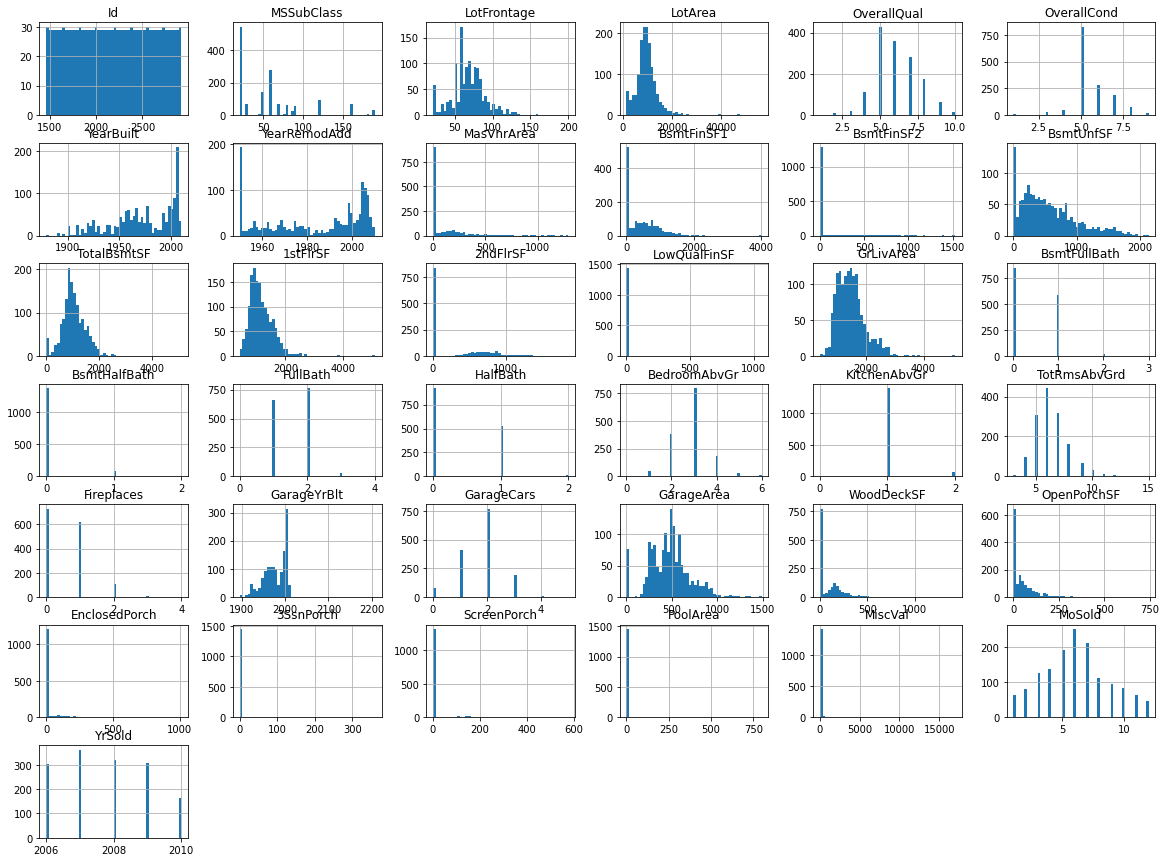

In [109]:
%matplotlib inline
import matplotlib.pyplot as plt
train_data.hist(bins=50, figsize=(20,15))
plt.savefig("attribute_histogram_plots")
plt.show()
# We can see the column chart for all the variables below.

In [111]:
corr_matrix = test_data.corr()
corr_matrix["SalePrice"].sort_values(ascending=False)
# corr_matrix["SalePrice"].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

In [134]:
# Before building a regression model we will have to do something about the numberical data that is in the dataset
from sklearn.preprocessing import LabelEncoder

categorical_col = ('GarageCond', 'RoofStyle', 'LandContour',  'Electrical', 'RoofMatl', 'Heating', 'Foundation', 'MiscFeature', 'SaleType', 'GarageType', 'SaleCondition', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'FireplaceQu', 'LotConfig', 'Neighborhood', 'Condition1', 'Condition2', 'Utilities', 'BldgType', 'HouseStyle','PoolQC', 'BsmtQual', 'BsmtCond', 'GarageQual','BsmtExposure', 'ExterQual', 'ExterCond','HeatingQC', 'KitchenQual', 'BsmtFinType1','BsmtFinType2', 'Functional', 'Fence', 'GarageFinish', 'LandSlope','LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 'YrSold', 'MoSold', 'MSZoning')
 
for values in categorical_col:
    end = LabelEncoder()
    end.fit(list(train_data[values].values))
    train_data[values] = end.transform(list(train_data[values].values))

x = train_data[train_data.columns[:80]]
y = test_data['SalePrice']    
from sklearn import model_selection


ValueError: ignored

In [134]:
x_train, x_test, y_train, y_test = model_selection.train_test_split(x, y, test_size=0.2)

# Calculating the r-square value
from sklearn.linear_model import LinearRegression
from sklearn import metrics
regressor = LinearRegression()  
regressor.fit(x_train, y_train)
calculated_value = regressor.predict(xtest)
print("R-square value", regressor.score(x_train,y_train))

In [134]:
# Calculating the root mean square error
import numpy as np
from sklearn.metrics import mean_squared_error
lin_mse = mean_squared_error(y_pred, y_test)
lin_rmse = np.sqrt(lin_mse)
print('Linear Regression RMSE: %.4f' % lin_rmse)
